# 11주차

### * 오차 행렬(2)

#### - 전체 양성 샘플중에서 얼마나 많은 샘플이 양성으로 분류되는지 측정하는 동작은 재현율과 관련된다.
#### - ROC 곡선은 예측 결과에 점수를 할당하는 여러 분류 기준을 비교하는데 분류기의 모든 임계값을 고려하며, 정밀도와 재현율 대신 TPR과 FRP를 나타낸다.

#### * 다중 분류과 회귀의 평가 지표
- 이진 분류 평가 지표에서 유도되는 다중 분류의 평가 지표
- 타깃을 과대 예측한 것 대비 과소 예측한 것을 분석하는 회귀의 평가 지표


#### * 모델 선택에서 평가 지표 사용
- scikit-learn 지원 scoring 매개 변수

#### [ 평가 지표와 측정(2) 실습 ]

In [3]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if(platform.system() == 'Darwin'):
    rc('font', family='AppleGothic')
elif(platform.system() == 'Windows'):
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('error')

In [4]:
# TN, FP, FN, TP
# 오차행렬의 결과를 요약 -> 정확도로 표현
# (TP + TN) / (TP + TN + FP + FN) = 정확도
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

from sklearn.dummy import DummyClassifier
import numpy as np

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

logreg = LogisticRegression(C=0.1, max_iter=3000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [7]:
# 정밀도와 재현율
# 정밀도 = TP / (TP + FP)
# 재현율 = TP / (TP + FN), 민감도, 적중률, 진짜 양성비율
from sklearn.metrics import f1_score

print("빈도 기반 모델의 f1_score : {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1_scoer : {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1_score : {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1_score : {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 모델의 f1_score : 0.00
무작위 더미 모델의 f1_scoer : 0.11
트리 모델의 f1_score : 0.55
로지스틱 회귀 모델의 f1_score : 0.92


In [8]:
# 정밀도와 재현율, f-점수를 한꺼번에 계산해서 
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["9 아님", "9"]))

# precision 정밀도
# recall 재현율

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
print(classification_report(y_test, pred_dummy, target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      0.90      0.90       403
           9       0.11      0.11      0.11        47

    accuracy                           0.81       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.81      0.81       450



In [10]:
print(classification_report(y_test, pred_tree, target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.94      0.97      0.95       403
           9       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [11]:
print(classification_report(y_test, pred_logreg, target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



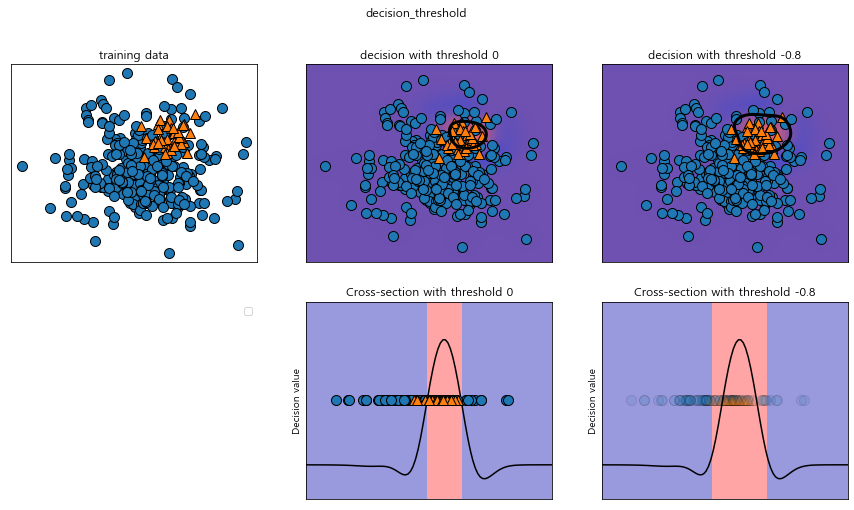

In [13]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import mglearn

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

In [14]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [15]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [18]:
print(classification_report(y_test, y_pred_lower_threshold))

# => 재현율보다 정밀도가 중요하거나 데이터가 심하게 불균형일때는 결정 함수의 임계값을 조절한다.

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



# 　

#### * 데이터 전처리와 매개 변수 선택
- 데이터 변환 과정과 머신러닝 모델을 쉽게 연결해주는 파이프라인 파이썬 클래스
- GridSearchCV를 사용


#### - 데이터 전처리에서 교차 검증 분할 방식을 적용하려 할 때 새 데이터를 반영하지 못할 수 있다. 이러한 이유로 교차 검증 불한을 모든 전처리 과정보다 앞서 이루어져야 한다. 

#### [ 데이터 전처리와 매개변수 선택 및 파이프라인 구축 실습 ]

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("테스트 점수 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수 : 0.97


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid = param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("테스트 점수 : {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 변수 : ", grid.best_params_)

최상의 교차 검증 정확도 : 0.98
테스트 점수 : 0.97
최적의 변수 :  {'C': 1, 'gamma': 1}


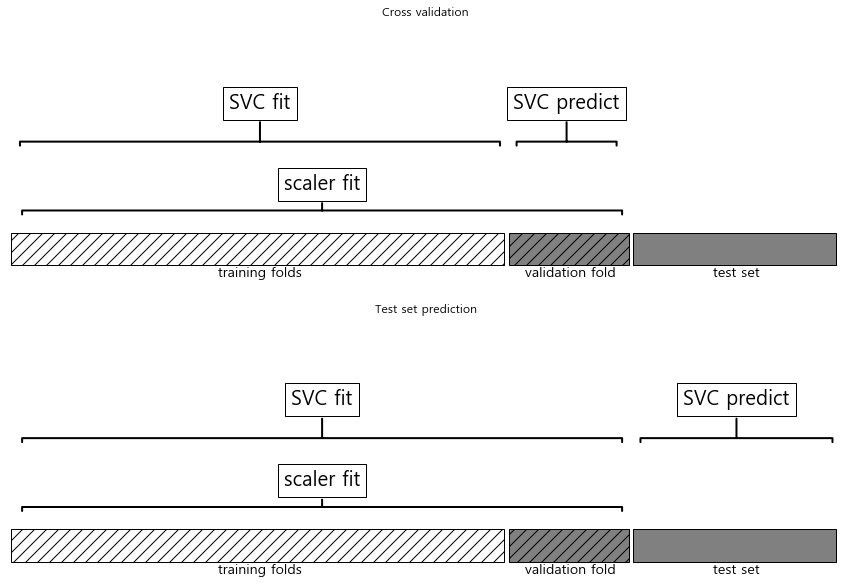

In [26]:
import mglearn

mglearn.plots.plot_improper_processing()

# => 교차검증의 분할 방식은 모델이 새 데이터를 만났을 때
#    전처리과정보다 앞서서 수행된다.

In [27]:
# 여러 처리 단계를 하나의 추정기 형태로 묶어주는 파이썬 클래스이다.
# 분류기 등의 지도학습 모델과 전처리 단계를 연결할 때 사용한다.

# - 파이프라인 구축 단계
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [28]:
print("테스트 점수 : {:.2f}".format(pipe.score(X_test, y_test)))

테스트 점수 : 0.97


In [30]:
param_grid = {'svm__C' : [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5)
grid.fit(X_train, y_train)

print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("테스트 점수 : {:.2f}".format(grid.score(X_test, y_test)))
print("최적의 변수 : ", grid.best_params_)

최상의 교차 검증 정확도 : 0.98
테스트 점수 : 0.97
최적의 변수 :  {'svm__C': 1, 'svm__gamma': 1}


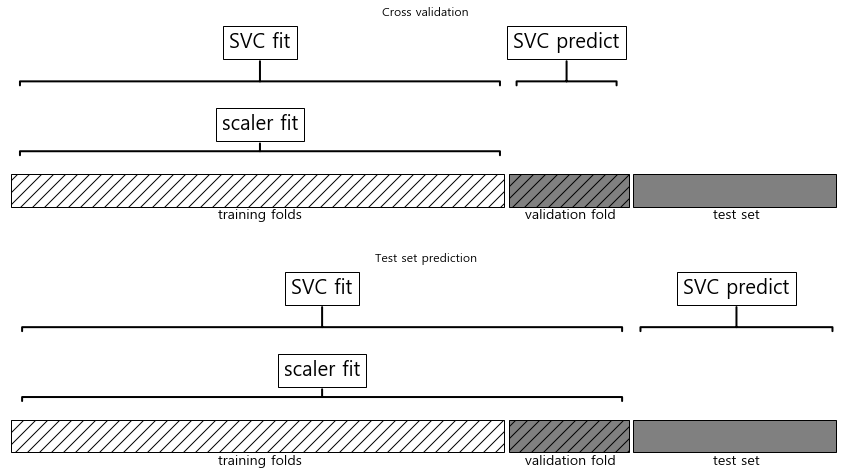

In [31]:
mglearn.plots.plot_proper_processing()

# 　

#### * 파이프라인 인터페이스
- 특성 추출, 특성 선택, 스케일 변경, 분류
- 전처리나 분류에 국한하지 않고 어떤 추정기와도 연결 가능

#### * 그리드서치
- 머신러닝 워크플로에 필요한 모든 처리 단계를 하나의 scikit-learn 추정기로 캡슐화
- 데이터 스케일 조정, 다항식 특성 선택, 리지 회귀의 세 단계



#### - 파이프라인은 전처리나 분류에 국한되지않고 추정기 연결이 가능하다
#### - 매개변수 그리드에 많은 매개변수를 추가하면 만들어야 할 모델이 급격히 많아짐에 따라 속도가 느려지는 단점이 있다.

#### [ 모델 선택을 위한 그리드서치 실습 ]

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
param_grid = {'svm__C' : [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('svm',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),


In [33]:
# 파이프라인은 전처리나 분류에 국한되지 않고 어떠한 추정기와 연결이 가능하다.
# transform을 가지고 있다는 특징이 있다.

def fit(self, X, y):
    X_transformed = X
    
    for name, estimator in self.steps[:-1]:
        X_transformed = estimator.fit_transform(X_transformed, y)
        
    self.steps[-1][1].fir(X_transformed, y)
    return self

def predict(self, X):
    X_transfored = X
    
    for step in self.steps[:-1]:
        X_transformed = step[1].transform(X_transformed)
    
    return self.steps[-1][1].predict(X_transfored)

In [34]:
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))]) # 표준형태
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100)) # 간략한 형태

print("파이프라인 단계 : \n", pipe_short.steps)

파이프라인 단계 : 
 [('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("파이프라인 단계 : \n", pipe.steps)

파이프라인 단계 : 
 [('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


In [37]:
pipe.fit(cancer.data)
# PCA 성분 추출

components = pipe.named_steps["pca"].components_

print("components.shape : ", components.shape)

components.shape :  (2, 30)


In [39]:
# 그리드서치 안의 파이프라인 속성 접근
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C' : [0.01, 0.1, 1, 10, 100]}

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("최상의 모델 : ", grid.best_estimator_)

최상의 모델 :  Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [41]:
# 전처리 모델의 매개변수를 위한 그리드서치
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [42]:
param_grid = {'polynomialfeatures__degree':[1,2,3],
              'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                         

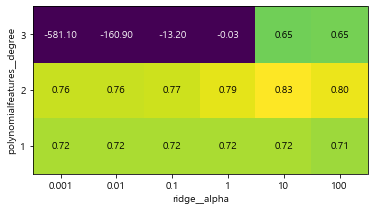

In [44]:
import mglearn
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                     xlabel="ridge__alpha", ylabel="polynomialfeatures__degree",
                     xticklabels=param_grid['ridge__alpha'],
                     yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [45]:
print("최적의 매개변수 : ", grid.best_params_)
print("테스트 세트 점수 : {:.2f}".format(grid.score(X_test, y_test)))

최적의 매개변수 :  {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
테스트 세트 점수 : 0.77


In [49]:
param_grid = {'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("다항 특성이 없을 때 점수 : {:.2f}".format(grid.score(X_test, y_test)))

다항 특성이 없을 때 점수 : 0.63
